1. Compute starting from their RA and Dec. the angular distance in arcseconds between
Alcor and Mizar starting from their Right Ascension and Declination. Also compute their
position angle, usually defined east of north (make the assumption of plane geometry,
given that their separation is small, so no need to do spherical trigonometry).

In [26]:
import math 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [2]:
# angular distance between Alcor and Mizar using RA and Dec. 
# Alcor: RA 13h 25m 14s | Dec +54° 59′ 17″
# Mizar: RA 13h 23m 56s | Dec +54° 55′ 31″

In [3]:
hour = 0 
mins = 0
secs = 0
deg = 0
arcmin = 0 
arcsec = 0 
#automated converter from HMS to DEG 
RA = 15 * (hour + mins * 1/60 + secs * 1/60 * 1/60)
DEC = deg + arcmin * 1/60 + arcsec * 1/60 * 1/60

In [4]:
# convert equitorial from HMS to DEG
# remember 360deg/24hr = 15deg/hr of RA
alcor_ra = 15 * (13 + 25 * 1//60 + 14 * 1//60 * 1//60)
alcor_dec = 54 + 59 * 1//60 + 17 * 1//60 *1//60
mizar_ra = 15 * (13 + 23 * 1//60 + 56 * 1//60 * 1//60)
mizar_dec = 54 + 55 * 1//60 + 31 * 1//60 *1//60

In [5]:
print('Alcor RA', alcor_ra,'Degrees')
print('Alcor Dec', alcor_dec,'Degrees')
print('Mizar RA', mizar_ra,'Degrees')
print('Mizar Dec', mizar_dec,'Degrees')

Alcor RA 195 Degrees
Alcor Dec 54 Degrees
Mizar RA 195 Degrees
Mizar Dec 54 Degrees


In [6]:
# angular separation/distance in degrees 
delta_d = alcor_dec - mizar_dec #dec
delta_a = alcor_ra - mizar_ra 
theta = (delta_d)**2 + (delta_a)**2 * np.cos(d_avg)**2

NameError: name 'd_avg' is not defined

In [7]:
# angular distance in arcsec/s 
del_a = ((25 * 60) + 14) - ((23 * 60) + 56)
del_d = ((59 * 60) + 17) - ((55 * 60) + 31)
d_avg = ((54 * 3600 + 59 * 60 + 17 * 60 * 60) + (54 * 3600 + 55 * 60 + 31 * 60 * 60))//2

In [8]:
print(del_d,'arceconds')
print(del_a,'arcseconds')
print(d_avg,'arcseconds')

226 arceconds
78 arcseconds
284220 arcseconds


In [10]:
theta = (del_d)**2 + (del_a)**2 * np.cos(d_avg)**2

In [11]:
print(theta, "Angular Separation between Mizar and Alcor in arcseconds")
print(theta//60, "Angular Separation between Mizar and Alcor in arcminutes" )

57083.14747919183 Angular Separation between Mizar and Alcor in arcseconds
951.0 Angular Separation between Mizar and Alcor in arcminutes


In [12]:
# position angle of Alcor & Mizar (angle east of north onto the sky)
# example: if you measured an angle of separation of 30 degrees between two stars 
# and the line connecting them points 45 degrees CW from north,
# the position angle of the second star relative to the first star is 45 degrees - 30 degrees = 15 degrees 
# CW from north

In [14]:
# position angle of Alcor (CW from north)
PA1 = 360000 - theta
print(PA1, 'position angle of Alcor in arcseconds')

302916.85252080817 position angle of Alcor in arcseconds


In [13]:
# position angle of Mizar
# using the same angular separation value of 57,083 arcseconds but measure in the opposite direction
PA2 = theta + 180000
print(PA2,'position angle of Mizar in arcseconds')

237083.14747919183 position angle of Mizar in arcseconds


2.Derive the law of cosines (Chromey equation 3.1) and then rewrite it in terms of RA
and declination. Use this to determine the separations for which the assumption of plane
geometry is valid. To do this, make a plot comparing separations calculated with the law
of cosines and the plane geometry assumption and see where they diverge from one-to-one.

We use LOC to calculate angular separations between two points on a sphere, such as celestial objects in the sky. It relates the lengths of the sides of a spherical triangle to the cosine of one of its angles.

Consider a spherical triangle with vertices A, B, and C, where sides a, b, and c are the arcs of great circles connecting these points. Let γ be the angular separation between points A and B, α the angular separation between points B and C, and β the angular separation between points C and A. The Law of Cosines for spherical triangles states:

cos(γ) = cos(α) * cos(β) + sin(α) * sin(β) * cos(c)

Now we rewrite the LOC in terms of RA and Dec using spherical trigonometry relations:

1. The angular separation (γ) between two celestial objects on the celestial sphere is equal to the great circle arc length (c) between them.
2. The Declination (Dec) of a celestial object is the angle between a line from the North Celestial Pole (NCP) to the object and the plane of the celestial equator.
3. The Right Ascension (RA) of a celestial object is the angle measured eastward along the celestial equator from the vernal equinox to the object.

With these definitions, we can rewrite the LOC in terms of RA and Dec. Let A and B be two celestial objects with coordinates (RA_A, Dec_A) and (RA_B, Dec_B).

γ = c  (angular separation)
α = 90° - Dec_A 
β = 90° - Dec_B 

Using these substitutions and knowing that c is the angular separation between A and B, we can rewrite LOC:

cos(c) = cos(90° - Dec_A) * cos(90° - Dec_B) + sin(90° - Dec_A) * sin(90° - Dec_B) * cos(RA_A - RA_B)

cos(c) = sin(Dec_A) * sin(Dec_B) + cos(Dec_A) * cos(Dec_B) * cos(RA_A - RA_B)

Giving LOC expressed in terms of RA & Dec for celestial objects. I.E.: can be used to find the angular separation  between two objects on a sphere sphere using RA and Dec coordinates.

In [18]:
# Function calculates the angular separation (degrees) between two celestial objects
def angular_separation(ra1, dec1, ra2, dec2):
    # Convert degrees to radians
    ra1_rad = np.radians(ra1)
    dec1_rad = np.radians(dec1)
    ra2_rad = np.radians(ra2)
    dec2_rad = np.radians(dec2)

    # Calculate the angular separation using the LOC
    cos_c = np.sin(dec1_rad) * np.sin(dec2_rad) + np.cos(dec1_rad) * np.cos(dec2_rad) * np.cos(ra1_rad - ra2_rad)

    # Calculate the angular separation in degrees
    c_rad = np.arccos(cos_c)
    c_deg = np.degrees(c_rad)

    return c_deg

# Example:
RA_A = 45.0  # RA of Star A in degrees
Dec_A = 30.0  # Dec of Star A in degrees
RA_B = 60.0  # RA of Star B in degrees
Dec_B = 20.0  # Dec of Star B in degrees

angular_sep = angular_separation(RA_A, Dec_A, RA_B, Dec_B)
print(f"Angular Separation between Star A and Star B: {angular_sep} degrees")

Angular Separation between Star A and Star B: 16.847753574824996 degrees


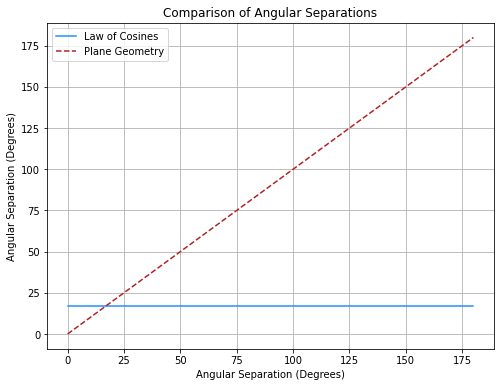

In [30]:
# To determine the separations for which the assumption of plane geometry is valid
# Create range of celestial object separations (in degrees)
separations_deg = np.linspace(0, 180, 1000)

# Calculate angular sep using the plane geometry assumption
separations_plane_deg = separations_deg

# Calculate angular sep using the LOC
ra1 = 45.0  # RA Star A in degrees
dec1 = 30.0  # Dec Star A in degrees
ra2 = 60.0  # RA Star B in degrees
dec2 = 20.0  # Dec Star B in degrees
angular_separations_cosines = [angular_separation(ra1, dec1, ra2, dec2) for d in separations_deg]

# Plotting the two methods
plt.figure(figsize=(8, 6))
plt.plot(separations_deg, angular_separations_cosines, label='Law of Cosines', color='dodgerblue')
plt.plot(separations_deg, separations_plane_deg, label='Plane Geometry', color='firebrick', linestyle='--')
plt.xlabel('Angular Separation (Degrees)')
plt.ylabel('Angular Separation (Degrees)')
plt.title('Comparison of Angular Separations')
plt.legend()
plt.grid(True)
plt.show()

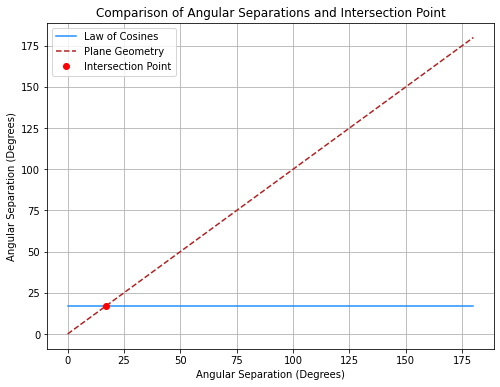

Intersection Point: 16.847753574824996 degrees


In [31]:
# Function calculates the intersection of the two angular separation functions
def intersection_function(separation):
    return angular_separation(ra1, dec1, ra2, dec2) - separation

# Init values for RA and Dec of stars A and B
ra1 = 45.0  # RA Star A in degrees
dec1 = 30.0  # Dec Star A in degrees
ra2 = 60.0  # RA Star B in degrees
dec2 = 20.0  # Dec Star B in degrees

# Create a range of celestial object separations (in deg)
separations_deg = np.linspace(0, 180, 1000)

# Calculate angular separations using the LOC 
angular_separations_cosines = [angular_separation(ra1, dec1, ra2, dec2) for d in separations_deg]

# Find the point of intersection by solving for the separation value
# We use fsolve to find the root (zero) of the intersection_function
# This gives the separation value where the two functions intersect
intersection_point = fsolve(intersection_function, 0)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(separations_deg, angular_separations_cosines, label='Law of Cosines', color='dodgerblue')
plt.plot(separations_deg, separations_plane_deg, label='Plane Geometry', color='firebrick', linestyle='--')
plt.plot(intersection_point, angular_separation(ra1, dec1, ra2, dec2), 'ro', label='Intersection Point')
plt.xlabel('Angular Separation (Degrees)')
plt.ylabel('Angular Separation (Degrees)')
plt.title('Comparison of Angular Separations and Intersection Point')
plt.legend()
plt.grid(True)
plt.show()


print(f"Intersection Point: {intersection_point[0]} degrees")


3. Using a tool such as the NASA/IPAC Extragalactic Database (NED) Coordinate Calculator,
find the RA and DEC of:
• Galactic Center
• Galactic anti-center
• Galactic North Pole
• Galactic South Pole
• The location(s) where the ecliptic crosses the Galactic Plane
Commit these, roughly, to memory.

Galactic Center:
<br>
RA: 17h 45m 36.0s 
DEC: -28° 55' 58.8"
<br>
Galactic Anti_Center:
<br>
RA: 6h 17m 0.0s
DEC: +22d 30m 0.0s
<br>
Galactic North Pole:
<br>
RA: 12h 51m 26.00s
DEC: +27d 7m 42.0s
<br>
Galactic South Pole:
<br>
RA: 0h 51m 26.00s
DEC: -27d 7m 42.0s
<br>
Location(s) Where the Ecliptic Crosses the Galactic Plane:
<br>
Vernal Equinox:
<br>
RA: 0h
DEC: 0°
<br>
Autunal Equinox:
<br>
RA: 12h
DEC: 0°

4. You’re going observing on September 1, 2023 at Kitt Peak to follow up several binary
supermassive black hole candidates from Charisi et al. (2016).
Without resorting to any software, estimate approximately when, local time, the following
objects will rise and set to within a couple hours. Use what you know about the Sun’s track
across the sky, and how its declination varies with seasons. Give the minimum airmass
achieved by each object during that 24-hour period.
• UM 269
• PDS 898
• PKS 2203-215

In [33]:
# Find RA and Dec of Objects 
# UM 269 00h43m19.737s, +00d51m15.47s / 10.832238, 0.854296
# PDS 898 15h36m58.313s, +34d31m49.48s / 234.242970, 34.530410
# PKS 22023-215 22h06m41.3822s, -21d19m40.513s / 331.672426, -21.327920

Sunrise and Sunset Times for Kitt Peak, Arizona 
<br>
I used EDT because I found sunset and sunrise times in EDT lol
<br>
UTC would be standard practice sorry.
<br>

1. Find Sunrise/Sunset times
**Sunrise Time:** 07:09 AM (EDT)
**Sunset Time:** 08:06 PM (EDT)

2. Consider Twilight
**Astronomical Twilight:**
- Astronomical twilight is the period when the sky is dark enough for astronomical observations. We can estimate it by subtracting/adding approximately 1.5 hours from/to the sunrise/sunset times.

**Evening/Morning Astronomical Twilight:**
- Start: 07:09 AM (EDT) + 1.5 hours = 05:39 AM (EDT)
- End: 07:09 AM (EDT) - 1.5 hours = 08:39 AM (EDT)
- Start: 08:06 PM (EDT) + 1.5 hours = 09:36 PM (EDT)
- End: 08:06 PM (EDT) - 1.5 hours = 06:36 PM (EDT)

3. Estimate the rise and set times and the minimum airmass for UM 269, PDS 898 and PKS 2203-215:

**UM 269 (RA: 00h43m19.737s, Dec: +00d51m15.47s):**
- UM 269 is near the celestial equator, so its rise and set times are semi-symmetric around midnight.
- Estimated Rise Time: between 09:36 PM (EDT) and 05:39 AM (EDT).
- Estimated Set Time: between 06:36 PM (EDT) and 08:39 AM (EDT).

**PKS 2203-215 (RA: 22h06m41.3822s, Dec: -21d19m40.513s):**
- PKS 2203-215 is in the southern sky, so it will be visible during the night.
- Estimated Rise Time: Around 09:36 PM (EDT) (evening astronomical twilight).
- Estimated Set Time: Around 05:39 AM (EDT) (morning astronomical twilight).

**PDS 898 (RA: 15h36m58.313s, Dec: +34d31m49.48s):**
- PDS 898 has a northern declination, so it may not be visible from Kitt Peak on this date because it's above the northern horizon.
- Estimated Rise Time: below the horizon at night.
- Estimated Set Time: below the horizon at night.

Due to its northern declination, PDS 898 may not be observable from Kitt Peak Observatory on September 1, 2023, as it will be below the horizon all night.


In [38]:
# Compute minimum airmass for each object 
# First find Zmin 
# Observatory latitude is the latitude of Kitt Peak Observatory, which is ~31.9583 degrees North.

#Zmin = |observatory latitude - source declination|

Zmin_UM269 = abs(31.9583 - 0.854296) #degrees
Zmin_PKS_2203_215 = abs(31.9583 - (-21.327920)) #degrees
Zmin_PDS_898 = abs(31.9583 - 34.530410) #degrees

print(f"Minimum Zenith of UM269: {Zmin_UM269} degrees")
print(f"Minimum Zenith of PKS_2203_215: {Zmin_PKS_2203_215} degrees")
print(f"Minimum Zenith of PDS_898: {Zmin_PDS_898} degrees")

Minimum Zenith of UM269: 31.104004 degrees
Minimum Zenith of PKS_2203_215: 53.28622 degrees
Minimum Zenith of PDS_898: 2.572110000000002 degrees


In [40]:
# Minimum airmass 
min_airmass1 = 1/np.cos(Zmin_UM269)
min_airmass2 = 1/np.cos(Zmin_PKS_2203_215)
min_airmass3 = 1/np.cos(Zmin_PDS_898)

In [41]:
print(f"Minimum Airmass of UM269: {min_airmass1} degrees")
print(f"Minimum Airmass of PKS_2203_215: {min_airmass2} degrees")
print(f"Minimum Airmass of PDS_898: {min_airmass3} degrees")

Minimum Airmass of UM269: 1.050701248214092 degrees
Minimum Airmass of PKS_2203_215: -1.007347689077627 degrees
Minimum Airmass of PDS_898: -1.1873945634778882 degrees


5. When you have completed the previous problem, check your answers using appropriate
software. I recommend pyskycalc from ThorSky1 or this website. In either case, you
should create a coordinate list including all the bold (i.e. significantly periodic) objects
in Table 2 of Charisi et al. (2016). Then set the site, date, and time in the software and
generate airmass (or altitude) plots for each target. Use these to check your answers for
the objects in the previous problem.

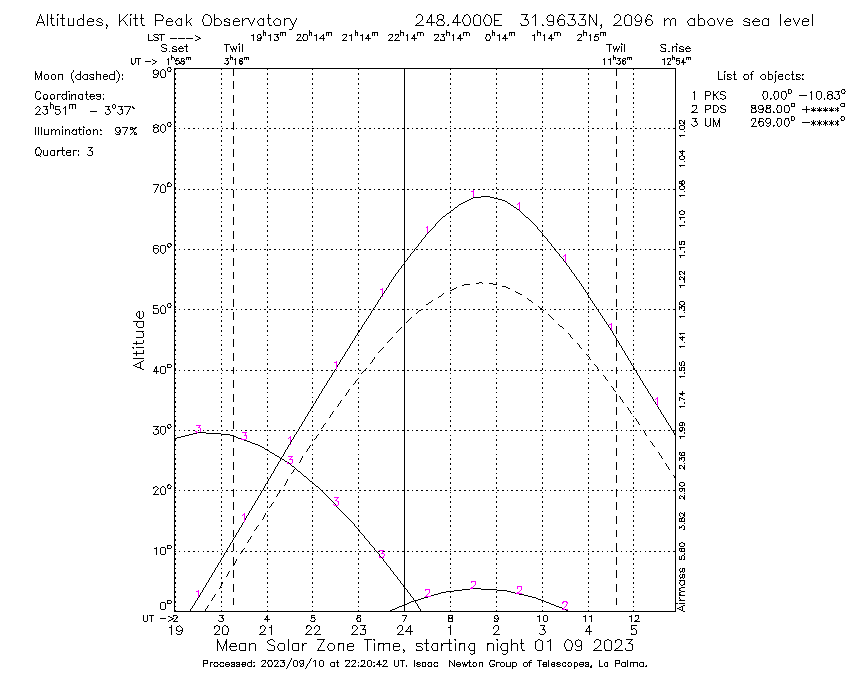

NOTE: could not generate others because of name or coordinates. I tried many different variations.

6. Write a table of vital stats for the following telescopes: Nu-STAR, Chandra, HST, Gemini,
SOAR, LCO, Spitzer, JWST, ALMA, NOEMA, VLBA, VLA
Break up the assignment so that each student does a handful of telescopes then merge
your answers. Include at least the following:
• full name (i.e. not the acronym)
• location
• aperture size
• operational wavelength range or photometric bands (this will be instrument dependent,
so list the instrument)
• website link


| Telescope               | Full Name                            | Location                   | Aperture Size       | Wavelength Range / Bands                    | Website Link                                         |
|-------------------------|-------------------------------------|----------------------------|---------------------|--------------------------------------------|------------------------------------------------------|
| Nu-STAR                 | Nuclear Spectroscopic Telescope Array | In Earth Orbit           | 0.1 - 79 keV         | X-ray (Hard X-rays)                        | [Nu-STAR Website](https://www.nustar.caltech.edu/)   |
| Chandra                 | Chandra X-ray Observatory            | In Earth Orbit           | 0.1 - 10 keV         | X-ray (Soft X-rays)                        | [Chandra X-ray Observatory](https://www.nasa.gov/mission_pages/chandra/main/index.html) |
| HST                     | Hubble Space Telescope               | In Earth Orbit           | 2.4 meters           | Ultraviolet (100 - 400 nm), Visible (400 - 700 nm), Near-Infrared (700 - 2500 nm) | [Hubble Site](https://hubblesite.org/)             |
| Gemini                  | Gemini Observatory                   | Multiple Locations        | 8.1 meters (Gemini North), 8.1 meters (Gemini South) | Optical (300 - 1100 nm), Infrared (1 - 25 microns) | [Gemini Observatory](https://gemini.edu/)           |
| SOAR                    | Southern Astrophysical Research Telescope | Cerro Pachón, Chile | 4.1 meters           | Optical (320 - 1000 nm), Infrared (1 - 5 microns) | [SOAR Telescope](http://www.ctio.noao.edu/soar/)     |
| LCO                     | Las Cumbres Observatory               | Multiple Locations        | Varies by Telescope | Optical (350 - 800 nm), Infrared (700 - 1100 nm) | [Las Cumbres Observatory](https://lco.global/)      |
| Spitzer                 | Spitzer Space Telescope               | In Earth Orbit           | 3 - 150,000 microns   | Infrared (3 - 150,000 microns)             | [Spitzer Space Telescope](https://www.jpl.nasa.gov/missions/spitzer-space-telescope/) |
| JWST                    | James Webb Space Telescope           | In Earth Orbit (L2)      | 0.6 - 28 microns      | Infrared (0.6 - 28 microns)               | [James Webb Space Telescope](https://webb.nasa.gov/content/about/launch.html) |
| ALMA                    | Atacama Large Millimeter/submillimeter Array | Atacama Desert, Chile | Array of 12-meter and 7-meter dishes | Millimeter (0.3 - 9.6 mm), Submillimeter (0.321 - 3.87 mm) | [ALMA Observatory](https://almascience.nrao.edu/)    |
| NOEMA                   | Northern Extended Millimeter Array    | French Alps              | 3 mm (Millimeter)  | Millimeter (3 mm)                        | [NOEMA Observatory](https://www.iram-institute.org/EN/noema.php) |
| VLBA                    | Very Long Baseline Array              | Multiple Locations in the U.S. | Array of radio telescopes | Radio (Centimeter and Millimeter Bands)  | [VLBA](https://science.nrao.edu/facilities/vlba/)   |
| VLA                     | Karl G. Jansky Very Large Array       | New Mexico, USA          | 27 radio antennas   | Radio (Centimeter and Millimeter Bands)  | [VLA](https://science.nrao.edu/facilities/vla/)    |


7. Create an “observational notebook”. This should include a directory on your computer
where you can store useful references to access them at the telescope and an electronic
format for saving your notes (e.g., with software like Evernote or Google Docs). For each
resource below, write up a 2–3 sentence summary of the usefulness and contents of each
paper. Are there other papers you’d recommend be in this list?
• The Kitt Peak Direct Imaging Manual
• Photometric Standards: Landolt, 1992, AJ, 104, 340
• A User’s Guide to Stellar CCD Photometry with IRAF: Massey & Davis, 1992
• A User’s Guide to CCD Reductions with IRA: Massey, 1997

In [ ]:
# I will be using Evernote for notes
# The table above and the information below is copied to Evernote.

1. **The Kitt Peak Direct Imaging Manual:**
   - This manual is a "quick" guide to using direct imaging techniques for astro observations. It covers instrument setup, data acquisition, and data reduction procedures specific to Kitt Peak Observatory's instruments, enabling researchers to optimize their observations and obtain high-quality images.
   - The manual also includes tips and tricks from the experience of others, helping new observers overcome common challenges specific to Kitt Peak.

2. **Photometric Standards: Landolt, 1992, AJ, 104, 340:**
   - Landolt's paper is a great reference for conducting photometric observations. It contains an extensive catalog of standard stars with well-defined photometric properties, aiding in the calibration of astronomical images and measurements. This paper can be used to accurately determine the magnitudes and colors of celestial objects.The catalog includes stars suitable for calibration in a wide range of photometric systems, making it adaptable to various observational setups worldwide. 
   - By comparing target objects with the standard stars known magnitudes and colors, we can correct for atmospheric and instrumental effects to produce reliable measurements.

3. **A User’s Guide to Stellar CCD Photometry with IRAF: Massey & Davis, 1992:**
   - Massey and Davis' user's guide is a good resource for using IRAF (Image Reduction and Analysis Facility) software for stellar CCD photometry. The paper has step-by-step guide to performing photometric measurements, including data reduction and analysis techniques. The guide is valuable tool for conducting precise photometric studies of stars.
   - The guide includes step-by-step instructions and examples for bias and dark subtraction, flat-fielding, and aperture photometry. The guide introduces the challenges specific to CCD photometry, such as the effects of cosmic rays, bad pixels, and photometric calibration.
   - The importance of understanding the uncertainties associated with photometric measurements is highlighted as well as a guide on error estimiation.
   
4. **A User’s Guide to CCD Reductions with IRA: Massey, 1997:**
   - Massey's user's guide is great for observers using IRAF for CCD data reduction. It provides in depth instructions and tips for reducing astronomical data obtained with CCD detectors, calibration, image processing, and photometric analysis. It provides a detailed explanation of the CCD data reduction process, including key steps such as bias subtraction, dark current correction, flat-fielding, and image calibration. These steps are critical for eliminating instrumental artifacts and enhancing the accuracy of measurements.
   - The paper also addresses data analysis tasks, including aperture photometry, image alignment, and combining of multiple frames for improved signal-to-noise ratio.

